## Import libraries yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

## Load data harga mobil bekas

In [3]:
row_data = pd.read_csv('audi.csv')
row_data.shape

(10668, 9)

In [4]:
row_data.describe

<bound method NDFrame.describe of       model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 c

## Bersihkan data yang tidak lengkap

In [5]:
data = row_data.dropna(axis=0)
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [6]:
print (row_data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


## Definisikan input output data yang menggunakan tipe data integer dan float

In [7]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = data[features]
y = data['price']
x.shape, y.shape

((10668, 5), (10668,))

## Membagi data untuk training dan validasi(test)

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

In [9]:
test_y.shape

(2667,)

## Membangun machine learning model dengan algoritma KNN

In [10]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# training the model:
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  84803043.9432887 
 Accuracy:  0.38095375928812836


## membangun elbow method

In [11]:
def Elbow(K):
  #initiating an empy list
  test_mse =[]

  #train model for every value of K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

## menampilkan grafik nilai k berdasarkan MSE

Text(0.5, 1.0, 'Elbow Curve for Test')

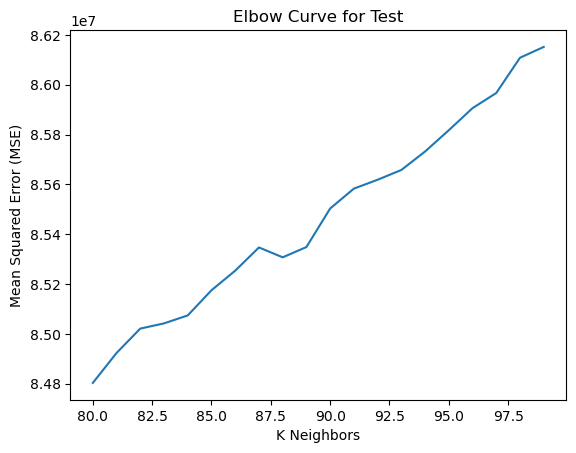

In [12]:
K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

### Melakukan koreksi nilai k dengan nilai k terbaik berdasarkan hasil dari elbow method 

In [13]:
new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n', 'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 37.24584746847454 
 Accuracy of old model (%): 38.095375928812835 
 Improvement (%): -0.8495284603383002


## contoh penggunaan machine learning yang dibuat

In [27]:
data_mobil_bekas = np.array([[2019,5000,145,30.2,2]])
prediction_old = model.predict(data_mobil_bekas)
prediction_new = new_model.predict(data_mobil_bekas)
print(' Hasil Prediksi harga mobil dengan old model: £', prediction_old, 'atau jika dirupiahkan yaitu: Rp', prediction_old * 18908*1e-9, 'Milyar\n',
      'Hasil Prediksi harga mobil dengan new model: £', prediction_new, 'atau jika dirupiahkan yaitu: Rp', prediction_new * 18908*1e-9, 'Milyar')

 Hasil Prediksi harga mobil dengan old model: £ [35635.5875] atau jika dirupiahkan yaitu: Rp [0.67379769] Milyar
 Hasil Prediksi harga mobil dengan new model: £ [34098.78350515] atau jika dirupiahkan yaitu: Rp [0.6447398] Milyar


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


## Simpan Model

In [28]:
import pickle

In [30]:
filename = 'mobil_model.sav'
pickle.dump(model, open(filename,'wb'))